In [1]:
import numpy as np
import pandas as pd
pd.set_option("max_colwidth", 200)
import matplotlib.pyplot as plt


# Load file

In [2]:
path_file = "./data/non_stop_word(3).json"
df = pd.read_json(path_file)

# Số lượng bình luận theo rate

In [3]:
print(len(df[df['rate']==0]))
print(len(df[df['rate']==1]))

1652191
306361


# Lọc bình luận tích cực
- Giảm bớt số lượng bình luận tích cực, bằng cách chỉ giữ lại nhừng bình luận có trên 15 từ trở lên

In [4]:
df_good = df[df['rate']==0]
df_good

,content,rate
2,hàng chất_lượng giá rẻ hơn cửa_hàng nhưng bỉm có mùi hàng chất_lượng giá rẻ hơn cửa_hàng nhưng bỉm có mùi hàng chất_lượng giá rẻ hơn cửa_hàng nhưng bỉm có mùi,0
8,bịch lớn nên dùng rất tiện không phải mua nhiều lần hầu_hết các cửa_hàng_không bán bịch to nên mình thường mua trên tikinăm mới tiki giao hàng chậm hơn năm cũthông thường mình mua hàng chỉ 2 ngày,0
9,mới đặt_hàng chiều muộn hôm trước sáng sớm hôm sau đã nhận được hàng quá nhanh quá bất_ngờ bỉm mềm_mỏng nhẹ sờ thích do còn bỉm cũ nên chưa sử_dụng chưa biết thế_nào nhưng trước_mắt thì tốt cám_ơn...,0
10,lâu không dùng bobby ( trc trung_thành với bobby 4 năm ) giờ quay lại dùng thấy bỉm mỏng nhg độ thấm hút không còn tốt nữa ngủ hay bị tràn hầu_như lần nào cũg tràn hơi thất_vọng ( hình_ảnh không l...,0
12,bỉm dùng tốt tuy_nhiên lớp chống tràn rất cứng mặc có vết lằn cho bé mỏng thấm hút nhanh hợp với giá tiền nên chọn hơn size cho bé thì mặc mới thoải_mái được,0
...,...,...
1958542,tốt,0
1958543,tôt,0
1958544,tốt,0
1958545,tốt,0


<BarContainer object of 19 artists>

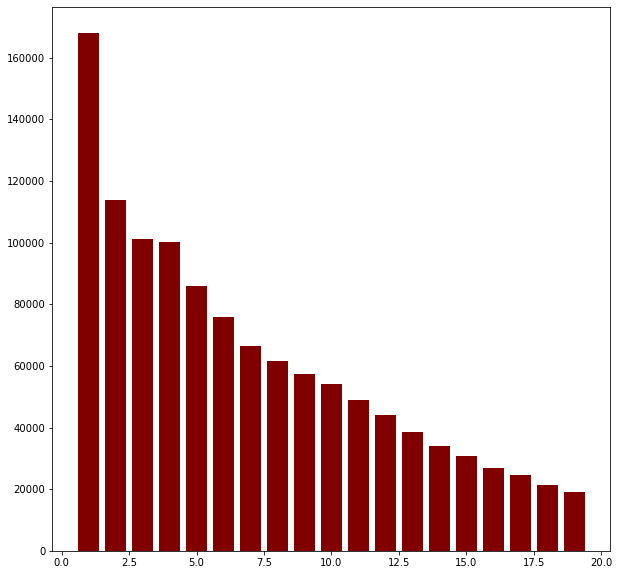

In [5]:
count = df_good['content'].str.split().apply(len).value_counts()
df_count = pd.DataFrame(count)
fig = plt.figure(figsize = (10, 10))
# x is index 20 word first
x = 20
labels =  np.arange(1,x)
value = df_count['content']
plt.bar(labels, df_count['content'][1:x], color ='maroon')
# labels

In [6]:
df_good = df[df['rate']==0]
def zero(text):
    arr = text.split()
    if len(arr) >= 15:
        return text
    else:
        return str('non')

    
df_good['content'] = df_good['content'].apply(lambda x: x.replace(
    str(x), zero(x)))

C:\Users\OnKhang\AppData\Local\Temp\ipykernel_9436\345787970.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_good['content'] = df_good['content'].apply(lambda x: x.replace(


#### Số bình luận ít hơn 15 từ

In [7]:
len(df_good[df_good['content']=="non"])

1261084

#### Số bình luận còn lại sau khi lọc

In [8]:
df_good_new = df_good[df_good['content'] != "non"]
len(df_good_new)

391107

In [9]:
df_good_new['content'].tail(10)

1958423                                                                                                                          hình_ảnh rất tốt dễ sử_dụng cài_đặt dễ và cực nhanh luôn đã mua đến lần thứ 3 rồi
1958426                                                                                                         tôi ấn nút nguồn có hiện nút xanh xong nó tắt luôn không hiện nút xanh nữa cửa_hàng xử_lý giúp tôi
1958474    android mình cài nhiều ứng_dụng mà không được kể_cả ứng_dụng trong hướng_dẫn gửi kèm hơn nữa ứng_dụng trong hướng_dẫn là của trung_quốc và nó còn yêu_cầu quyền truy_cập đến vị_trí mới láo trong kh...
1958477                                           khó lấy lắm ạ chỉ có_thể xem thôi ạma mỗi lần xem phải tải ứng_dụng nên hơi phiền_phức về chất_lượng hình_ảnh thì tốt nha thấy tới màng_nhĩ luôn hình_ảnh rõ nét
1958478                                                     đường_kính đèn soi hơi lớn nên khi gắn thêm bộ lấy ráy_tai khó đưa vào tai một_cách dễ_dàng để s

# Lọc bình luận tiêu cực
- Làm tương tự như bình luận tích cực

In [10]:
df_bad = df[df['rate']==1]
df_bad

,content,rate
0,mua bỉm đợt sale 1 tr600k cho 4 bịch bỉm thì bị chia thành 2 đơn do hết hàng đợi vận_chuyển dài cả cổ nhưng cái chính là lúc thêm vào giỏ hàng thấy được tặng xe bập_bênh nhưng 30 giây sau khi than...,1
1,quá tệ1 về giao hàng với chăm_sóc khách_hàng mình đồng_ý mùa dịch nên giao hàng có_thể chậm_trễ hơn so với bình_thường nhưng cách chậm_trễ và đặc_biệt dịch_vụ chăm_sóc khách_hàng quá tệ liên_hệ ph...,1
3,chất_lượng bỉm thì tốt mà bên giao hàng và bên hỗ_trợ từ số hotline quá chậm chễ mình đặt 2 bịch cho 2 đứa 1 size xxl 1 size l đến ngày hẹn giao hàng chờ cả ngày không thấy đến tối muộn có nhân_vi...,1
4,hàng giả mọi người ơi đừng mua vì cái tã này mỏng hơn cái tã mình mua trực_tiếp của bobby luôn mọi người cẩn_thận nhé 419 k không phải ít tiền vì_vậy đừng để mua nhầm như mình,1
5,nhận được hàng vui_lam nhưng có thắc_mắc xiu gia ghi là 816100 nhưng nhận vien giao lai thứ mình 825000 đ mình cũng không y kien gi vì tình hinh dịch_bệnh qua nhưng mình không thich kiểu thứ tien ...,1
...,...,...
1958547,liên_hệ với tôi nhé máy_bay không tìm thấy chỗ để sạc pin,1
1958548,cửa_hàng cái đầu này cắm tn đăng_ký,1
1958549,tại_sao giao mình lại thiếu_phụ_kiện máy_ảnh vậy cửa_hàng,1
1958550,không có hướng_dẫn tiếng việt,1


<BarContainer object of 19 artists>

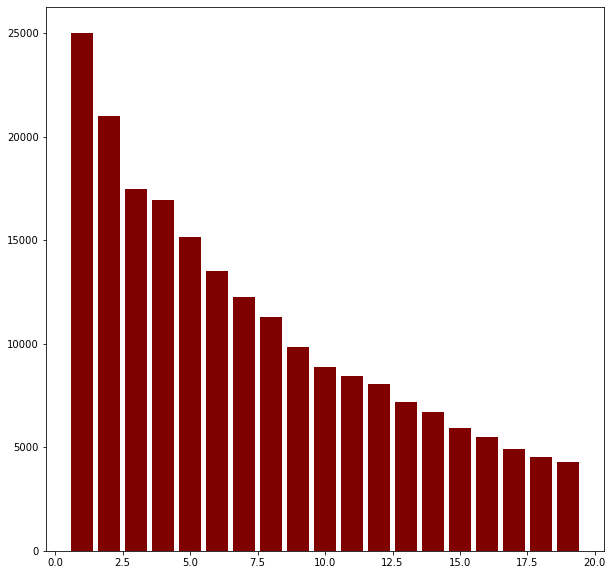

In [11]:
count = df_bad['content'].str.split().apply(len).value_counts()
df_count = pd.DataFrame(count)
fig = plt.figure(figsize = (10, 10))
# x is index 20 word first
x = 20
labels =  np.arange(1,x)
value = df_count['content']
plt.bar(labels, df_count['content'][1:x], color ='maroon')
# labels

In [12]:
df_bad = df[df['rate']==1]
def zero(text):
    arr = text.split()
    if len(arr) >= 15:
        return text
    else:
        return str('non')

    
df_bad['content'] = df_bad['content'].apply(lambda x: x.replace(
    str(x), zero(x)))

C:\Users\OnKhang\AppData\Local\Temp\ipykernel_9436\3159359599.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bad['content'] = df_bad['content'].apply(lambda x: x.replace(


In [13]:
df_bad

,content,rate
0,mua bỉm đợt sale 1 tr600k cho 4 bịch bỉm thì bị chia thành 2 đơn do hết hàng đợi vận_chuyển dài cả cổ nhưng cái chính là lúc thêm vào giỏ hàng thấy được tặng xe bập_bênh nhưng 30 giây sau khi than...,1
1,quá tệ1 về giao hàng với chăm_sóc khách_hàng mình đồng_ý mùa dịch nên giao hàng có_thể chậm_trễ hơn so với bình_thường nhưng cách chậm_trễ và đặc_biệt dịch_vụ chăm_sóc khách_hàng quá tệ liên_hệ ph...,1
3,chất_lượng bỉm thì tốt mà bên giao hàng và bên hỗ_trợ từ số hotline quá chậm chễ mình đặt 2 bịch cho 2 đứa 1 size xxl 1 size l đến ngày hẹn giao hàng chờ cả ngày không thấy đến tối muộn có nhân_vi...,1
4,hàng giả mọi người ơi đừng mua vì cái tã này mỏng hơn cái tã mình mua trực_tiếp của bobby luôn mọi người cẩn_thận nhé 419 k không phải ít tiền vì_vậy đừng để mua nhầm như mình,1
5,nhận được hàng vui_lam nhưng có thắc_mắc xiu gia ghi là 816100 nhưng nhận vien giao lai thứ mình 825000 đ mình cũng không y kien gi vì tình hinh dịch_bệnh qua nhưng mình không thich kiểu thứ tien ...,1
...,...,...
1958547,non,1
1958548,non,1
1958549,non,1
1958550,non,1


In [14]:
print(len(df_bad[df_bad['content'] == "non"]))

185521


In [15]:
df_bad_new = df_bad[df_bad['content'] != "non"]
len(df_bad)

306361

# Gộp 2 bảng lại

In [16]:
df_good_new

,content,rate
2,hàng chất_lượng giá rẻ hơn cửa_hàng nhưng bỉm có mùi hàng chất_lượng giá rẻ hơn cửa_hàng nhưng bỉm có mùi hàng chất_lượng giá rẻ hơn cửa_hàng nhưng bỉm có mùi,0
8,bịch lớn nên dùng rất tiện không phải mua nhiều lần hầu_hết các cửa_hàng_không bán bịch to nên mình thường mua trên tikinăm mới tiki giao hàng chậm hơn năm cũthông thường mình mua hàng chỉ 2 ngày,0
9,mới đặt_hàng chiều muộn hôm trước sáng sớm hôm sau đã nhận được hàng quá nhanh quá bất_ngờ bỉm mềm_mỏng nhẹ sờ thích do còn bỉm cũ nên chưa sử_dụng chưa biết thế_nào nhưng trước_mắt thì tốt cám_ơn...,0
10,lâu không dùng bobby ( trc trung_thành với bobby 4 năm ) giờ quay lại dùng thấy bỉm mỏng nhg độ thấm hút không còn tốt nữa ngủ hay bị tràn hầu_như lần nào cũg tràn hơi thất_vọng ( hình_ảnh không l...,0
12,bỉm dùng tốt tuy_nhiên lớp chống tràn rất cứng mặc có vết lằn cho bé mỏng thấm hút nhanh hợp với giá tiền nên chọn hơn size cho bé thì mặc mới thoải_mái được,0
...,...,...
1958480,giả rẻ nhưng cũng công_nghệ ghê đầu kết_nối rất nhiều cổng cho người dùng sử_dụng tuy_nhiên cái ngoáy tai thì to không ngoáy được dùng để soi tai rất hay,0
1958531,sản_phẩm rất tốt hàng chuẩn chính hàng chất_lượng điểm_ảnh 4 mp nhìn nét cực_âm_thanh ở tầm vừa_vừa không to như mấy cái máy_ảnh ngoài_trời nhưng giá này được chất lươgnj 40 thật là không_đâu bằng,0
1958533,sản_phẩm tốt tuy_nhiên tính_năng quay quét phát ra tiếng kêu cảm_giác không được chắc_chắn nhưng với tầm giá thì tốt,0
1958534,quá nét hình_ảnh xem rõ nét căng luôn nếu có điều_kiện chắc_chắn sẽ mua thêm máy_ảnh này nữa cửa_hàng hướng_dẫn tận_tình,0


In [17]:
df_bad_new

,content,rate
0,mua bỉm đợt sale 1 tr600k cho 4 bịch bỉm thì bị chia thành 2 đơn do hết hàng đợi vận_chuyển dài cả cổ nhưng cái chính là lúc thêm vào giỏ hàng thấy được tặng xe bập_bênh nhưng 30 giây sau khi than...,1
1,quá tệ1 về giao hàng với chăm_sóc khách_hàng mình đồng_ý mùa dịch nên giao hàng có_thể chậm_trễ hơn so với bình_thường nhưng cách chậm_trễ và đặc_biệt dịch_vụ chăm_sóc khách_hàng quá tệ liên_hệ ph...,1
3,chất_lượng bỉm thì tốt mà bên giao hàng và bên hỗ_trợ từ số hotline quá chậm chễ mình đặt 2 bịch cho 2 đứa 1 size xxl 1 size l đến ngày hẹn giao hàng chờ cả ngày không thấy đến tối muộn có nhân_vi...,1
4,hàng giả mọi người ơi đừng mua vì cái tã này mỏng hơn cái tã mình mua trực_tiếp của bobby luôn mọi người cẩn_thận nhé 419 k không phải ít tiền vì_vậy đừng để mua nhầm như mình,1
5,nhận được hàng vui_lam nhưng có thắc_mắc xiu gia ghi là 816100 nhưng nhận vien giao lai thứ mình 825000 đ mình cũng không y kien gi vì tình hinh dịch_bệnh qua nhưng mình không thich kiểu thứ tien ...,1
...,...,...
1958481,không dùng được vì không cắm được vào điện_thoại chỉ nối vào máy_tính được thôi,1
1958483,phần_mềm sử_dụng không được mua về cũng chẳng làm được gì quảng_cáo thì hay làm_sao dám mua mặt_hàng đắc tiền,1
1958484,tôi không_thể tải ứng_dụng và cài_đặt để sử_dụng được sản_phẩm đã mua đề_nghị hỗ_trợ ngay,1
1958485,chỉ dùng cho pc hoặc android máy_ảnh khá thô nên chỉ dùng đc cho người_lớn,1


### Lấy 4000 bình luận tích cực và 2500 bình luận tiêu cực

In [18]:
frame = [df_good_new[:4000], df_bad_new[:2500]]
total = pd.concat(frame)

TÍch cực:  4000
Tiêu cực:  2500


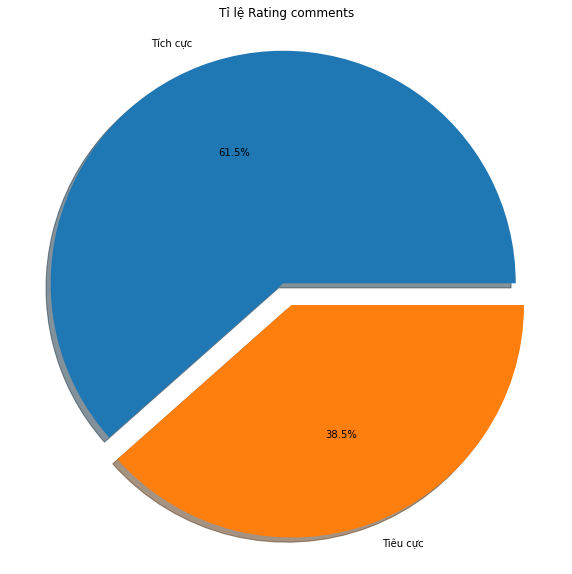

In [19]:
def func(pct):
    return "{:1.1f}%".format(pct)
def numRateBinary(df_frame):
   # get number rate
    rate_0 = len((df_frame[df_frame['rate'] == 0]))
    rate_1 = len((df_frame[df_frame['rate'] == 1]))
    #
    print("TÍch cực: ", rate_0)
    print("Tiêu cực: ", rate_1)
    #
    return [rate_0, rate_1]
# Get value
numRateArray = numRateBinary(total)
labels = ['Tích cực', 'Tiêu cực']
# Ve
plt.figure(figsize=(10, 10))
plt.pie(numRateArray, labels=labels,
        autopct=lambda pct: func(pct), explode=[0, 0.1], shadow=True)
plt.title('Tỉ lệ Rating comments')
plt.axis('equal')
plt.show()


#### Xáo trộn dữ liệu

In [20]:
total.sample(frac=1, replace=True)

,content,rate
4547,shipper giao hàng khó_chịu thái_độ không tốt mình xin_lỗi vì mình mới chuyển nhà mới số 9 a sát vách nhà số 9 bên kia mình cho thuê nhưng *_*_* và mọi thứ còn lại đều đúng shipper giao tới có_thể ...,1
12274,hàng tốt giá rẻ hơn nhiều so với mua ngoài nhưng đợt này tiki giao hàng quá chậm,0
23594,vote hẳn 5 sao vì viên nén omo vesta vệ_sinh lồng giặt quá_ư là tốt rồi xin sò mà giá phải chăng nữa quần_áo nhờ thế cũng tốt tho không bị mùi ẩm mốc cực_kỳ ưng_ý luôn sẽ đặt thêm nữa về xài,0
53958,chất_lượng tốt mùi tốt dễ_chịu kết_hợp với nước xả dnee nữa sẽ mềm quần_áo và tốt lâu hơn,1
1962,nước giặt đặc tốt giao hàng nhanh đóng_gói cẩn_thận giá sale lại được tặng quà,0
...,...,...
22895,tikinow giao hàng nhanhmua đợt sales được giá mềmchất lượng tốt hương cực_kì tốt và dễ_chịu,0
15688,sản_phẩm tốt mùi rất tốt luôn giao hàng nhanh ghê luôn quà tặng đúng đẹp ạ,0
24786,đã nhận được hànggiao hàng nhanhsáng nay đặt là giao hàng vào sáng hôm sau rồicảm ơn tiki,0
27281,giao hàng nhanh giật_mình luôn đóng_gói cẩn_thận 111 mua đc giá tốt quá cảm_ơn tiki nhiều,0


# Variable label & content

In [21]:
content = total['content']
labels = total['rate']
print(content.shape)
print(labels.shape)


(6500,)
(6500,)


# Import Bert

In [22]:
import torch
from transformers import AutoModel, AutoTokenizer

phobert = AutoModel.from_pretrained("vinai/phobert-base")
tokenizer = AutoTokenizer.from_pretrained("vinai/phobert-base")

Some weights of the model checkpoint at vinai/phobert-base were not used when initializing RobertaModel: ['lm_head.decoder.weight', 'lm_head.layer_norm.weight', 'lm_head.dense.bias', 'lm_head.dense.weight', 'lm_head.bias', 'lm_head.layer_norm.bias', 'lm_head.decoder.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


#### Tokenized

In [23]:
max_len = 50
# index user random
index = 50

In [24]:
tokenized = content.apply(lambda x: tokenizer.encode(
    x, max_length=max_len, truncation=True))

# Padding
- Padding để đảm bảo input có độ dài như nhau

In [25]:
padded = np.array([i + [0]*(max_len-len(i)) for i in tokenized.values])
print('padded:', padded[index])
print('len padded:', padded.shape)

padded: [    0  2081  5418   574   119  1031   485 49833   878   654    71    64
  2018   654    53    14    30   182 39393  9353  3188     6  3857     2
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0]
len padded: (6500, 50)


In [27]:
import pickle

def _save_pkl(path, obj):
  with open(path, 'wb') as f:
    pickle.dump(obj, f)


# Lưu lại các files
_save_pkl('./file_pkl/padding.pkl', padded)
_save_pkl('./file_pkl/labels.pkl', labels)